In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Linear_Regression as lr # Custom created module implements Linear regression using Gradient Descent

# Validate Models
## Vanilla
Use toy data to validate algorithms

Solver summary:
Number of iterations:  54
MSE:  0.16354374311931646
Stop criteria was reached first:  True
Model Training accuracy:  0.9976430460550452


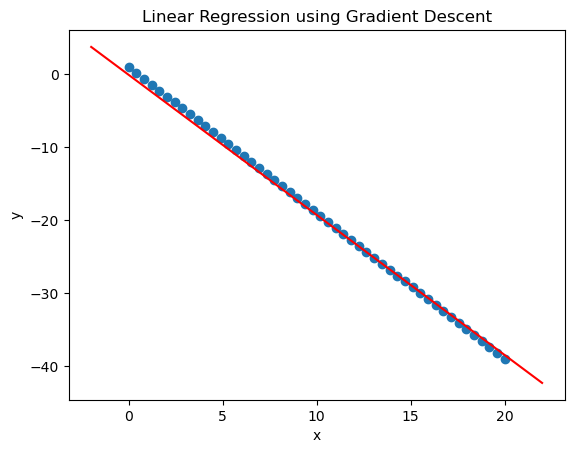

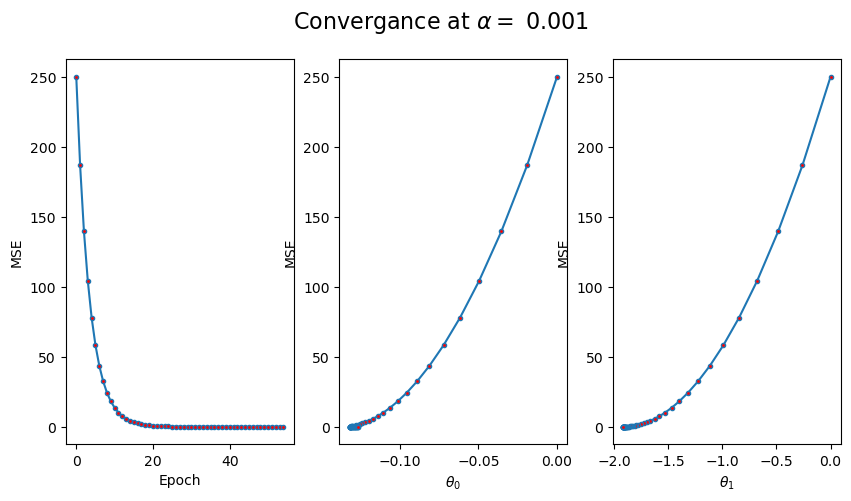

In [2]:
# Toy data
x = np.linspace(0, 20)
y = -2 * x + 1

# Test Toy data on model, the points and line should coincide
X = np.atleast_2d(x).T
y = np.atleast_2d(y).T
lr_test_vanilla = lr.Linear_Regression(X, y)
lr_test_vanilla.fit(solver="batch", stop_criteria=1e-4)
lr_test_vanilla.show_summary()
lr_test_vanilla.plot_LR_2D()
lr_test_vanilla.plot_MSE()

## Mini batch
Test on mini_batch

Solver summary:
Number of iterations:  1484
MSE:  0.7105618532477026
Stop criteria was reached first:  True
Model Training accuracy:  0.9898806205725723


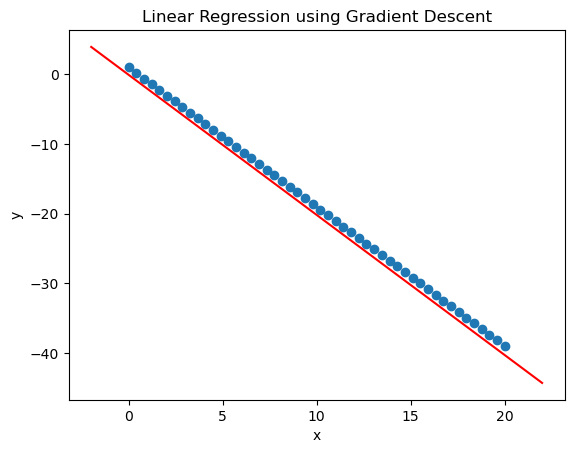

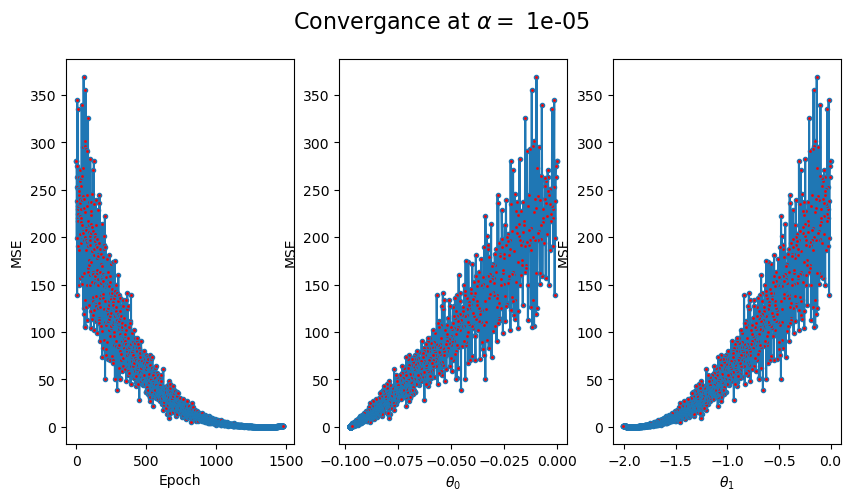

In [3]:
lr_test_mini = lr.Linear_Regression(X, y)
lr_test_mini.fit(solver="mini_batch", stop_criteria=1e-3, n_batches=4, alpha=1e-5, max_epochs=1e4, seed=500)
lr_test_mini.show_summary()
lr_test_mini.plot_LR_2D()
lr_test_mini.plot_MSE()

## Stochastic 
Test stochastic gradient descent solver on toy data

Solver summary:
Number of iterations:  3100
MSE:  0.000337606352847165
Stop criteria was reached first:  True
Model Training accuracy:  0.9970100060819082


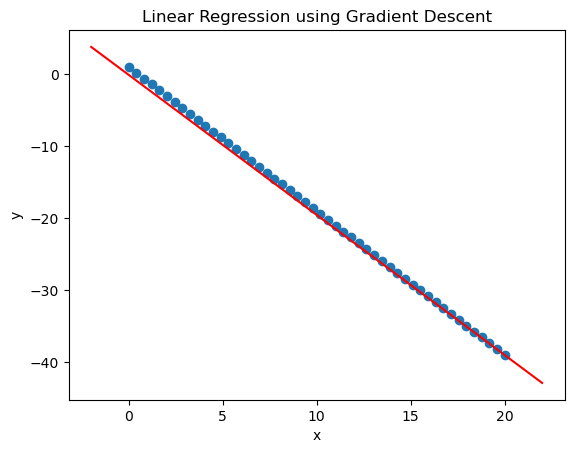

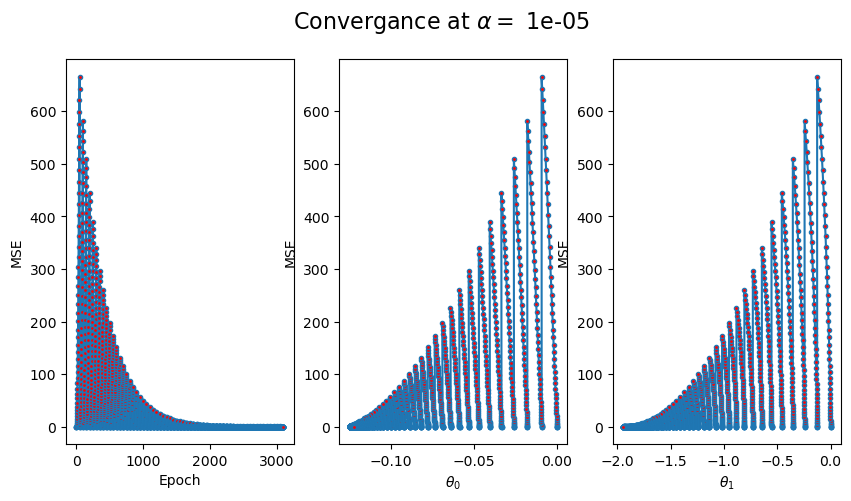

In [4]:
lr_test_st = lr.Linear_Regression(X, y)
lr_test_st.fit(solver="stochastic", stop_criteria=1e-3, alpha=1e-5, max_epochs=1e4)
lr_test_st.show_summary()
lr_test_st.plot_LR_2D()
lr_test_st.plot_MSE()

# Imperfect data
Use Models on noisy data

In [5]:
# Read Data
df = pd.read_csv('RegData.csv', header=None)
df.head()

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


# Batch Gradient Descent

In [6]:
# Prepare data as numpy arrays
X = np.atleast_2d(df[0].to_numpy()).T
y = df[1].to_numpy()
y = np.atleast_2d(y).T

Solver summary:
Number of iterations:  91
MSE:  0.21260420563374743
Stop criteria was reached first:  True
Model Training accuracy:  0.7333176762950011


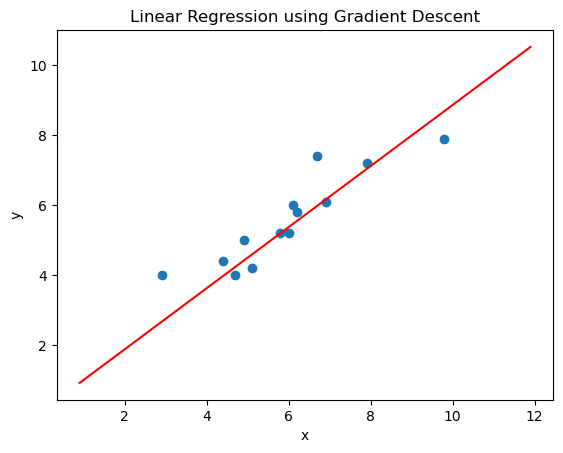

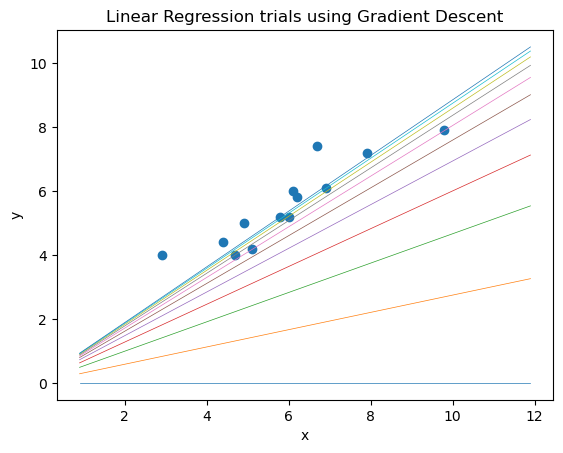

In [7]:
# Initialize object from class Linear regression and solve
# Batch GD
lr_batch = lr.Linear_Regression(X, y)
theta = lr_batch.fit(solver="batch", alpha=1e-3, max_epochs=1e3)
lr_batch.show_summary()
lr_batch.plot_LR_2D(show_trials=True)

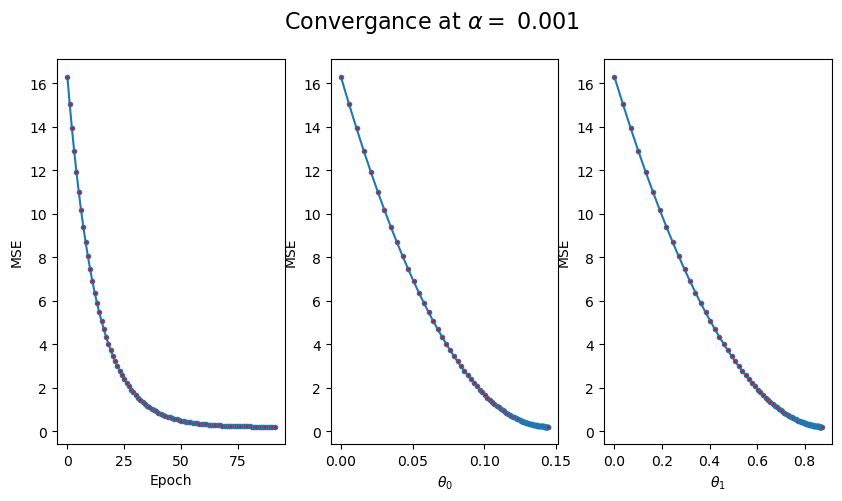

In [8]:
lr_batch.plot_MSE()

# Mini Batch Gradient Descent

Solver summary:
Number of iterations:  1000
MSE:  0.019429168119961097
Stop criteria was reached first:  False
Model Training accuracy:  0.6890155023703507


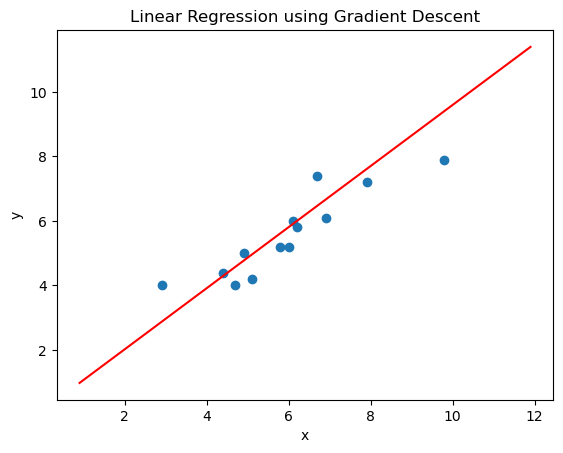

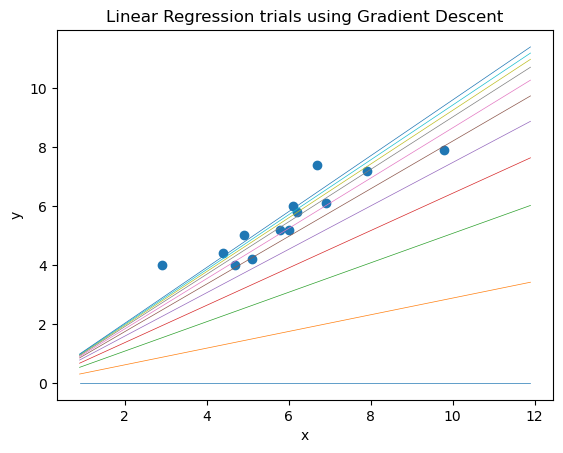

In [9]:
# Initialize object from class Linear regression and solve
# Mini Batch GD
lr_mini_batch = lr.Linear_Regression(X, y)
theta = lr_mini_batch.fit(solver="mini_batch", alpha=1e-4, max_epochs=1e3, n_batches=8, stop_criteria=1e-4, seed=42)
lr_mini_batch.show_summary()
lr_mini_batch.plot_LR_2D(show_trials=True)

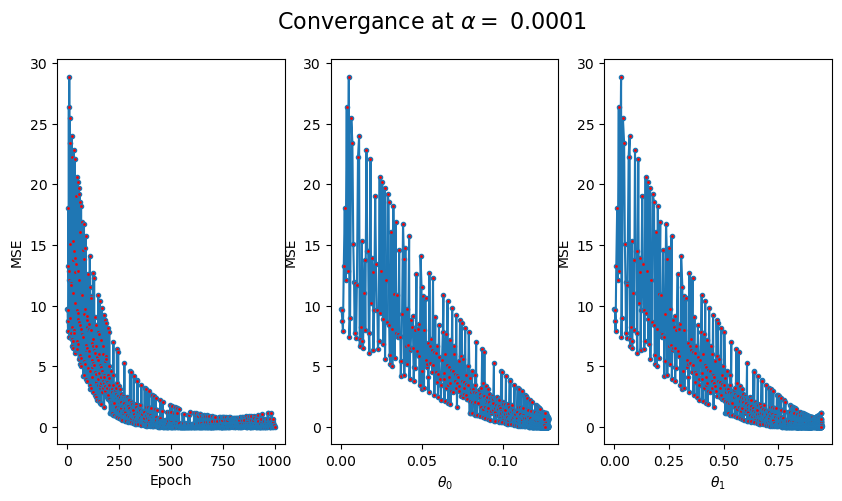

In [10]:
lr_mini_batch.plot_MSE()

# Stochastic Gradient Descent

Solver summary:
Number of iterations:  1001
MSE:  0.0362718468517147
Stop criteria was reached first:  False
Model Training accuracy:  0.7334667903114807


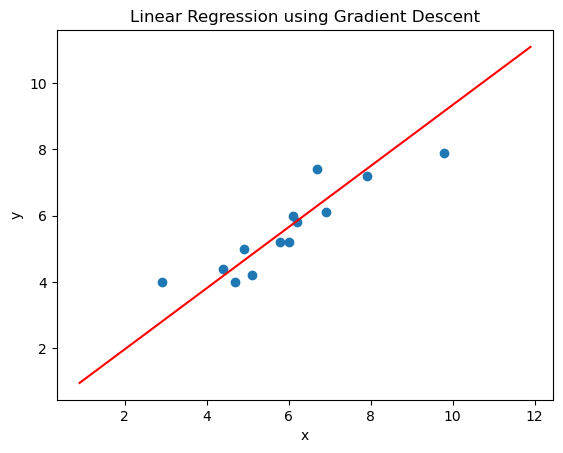

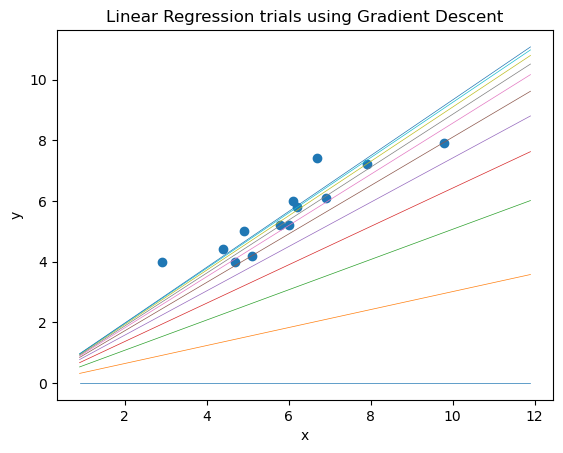

In [11]:
# Initialize object from class Linear regression and solve
# Stochastic Batch GD
lr_stochastic = lr.Linear_Regression(X, y)
theta = lr_stochastic.fit(solver="stochastic", alpha=1e-4, max_epochs=1e3, stop_criteria=1e-5)
lr_stochastic.show_summary()
lr_stochastic.plot_LR_2D(show_trials=True)

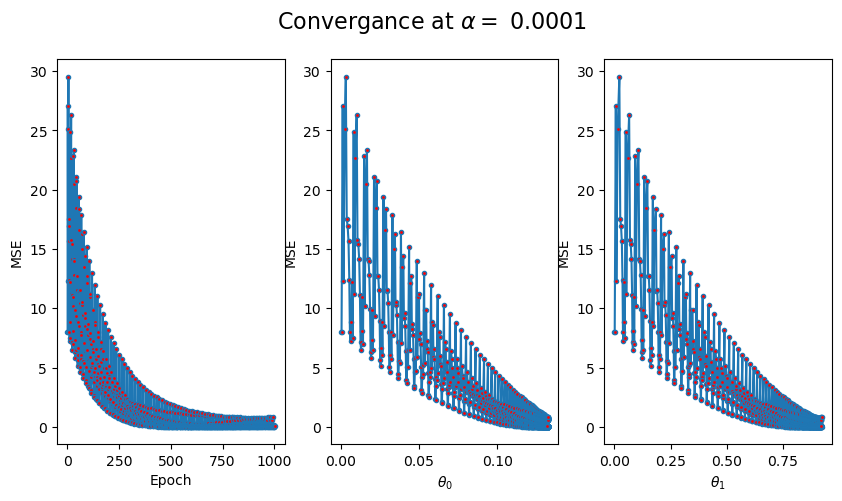

In [12]:
lr_stochastic.plot_MSE()

# Algorithms Comparison
Fix learning rate and number of epochs in all three algorithms are compare output
## First comparison

Solver summary:
Number of iterations:  91
MSE:  0.21260420563374743
Stop criteria was reached first:  True
Model Training accuracy:  0.7333176762950011


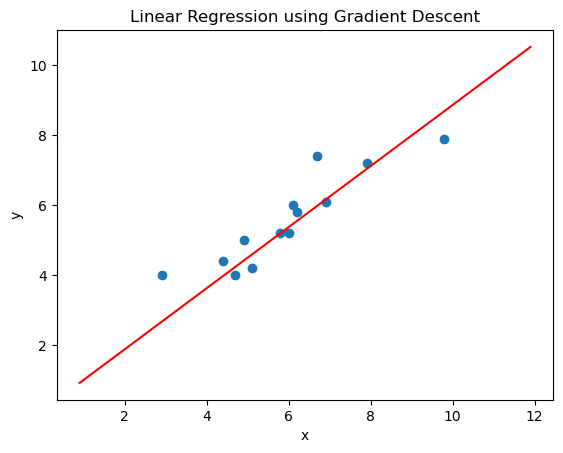

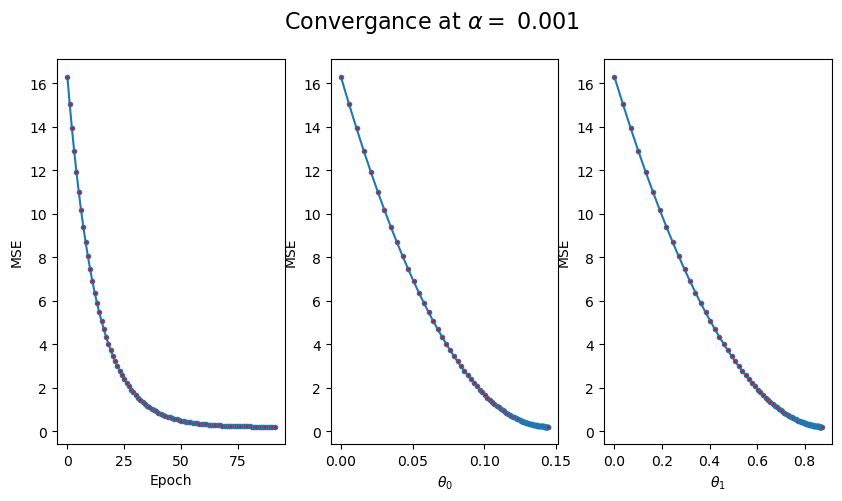

In [13]:
lr_compare_vanilla = lr.Linear_Regression(X, y)
lr_compare_vanilla.fit(solver="batch", alpha=1e-3, stop_criteria=1e-3, max_epochs=1e4)
lr_compare_vanilla.show_summary()
lr_compare_vanilla.plot_LR_2D()
lr_compare_vanilla.plot_MSE()

Solver summary:
Number of iterations:  10000
MSE:  1.4923931231289673
Stop criteria was reached first:  False
Model Training accuracy:  -0.448387986247035


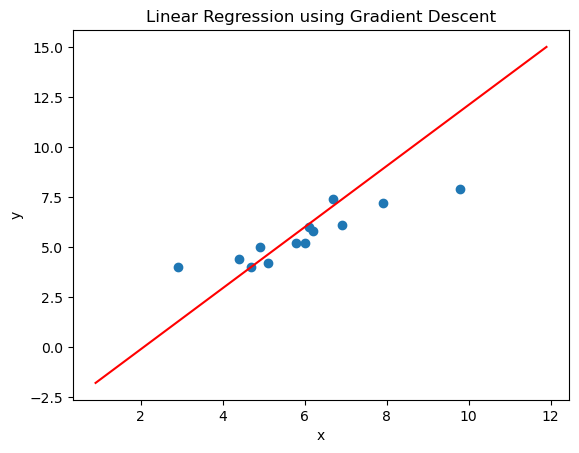

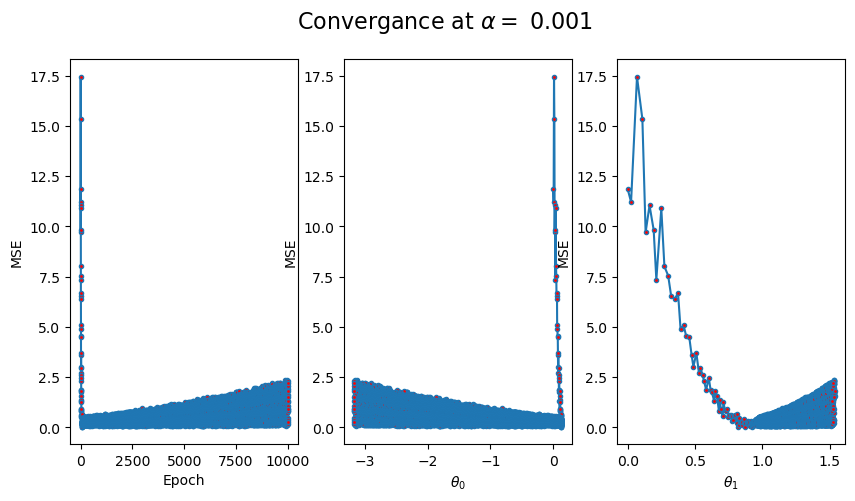

In [14]:
lr_compare_mini = lr.Linear_Regression(X, y)
lr_compare_mini.fit(solver="mini_batch", alpha=1e-3, n_batches=2, stop_criteria=1e-3, max_epochs=1e4, seed=42)
lr_compare_mini.show_summary()
lr_compare_mini.plot_LR_2D()
lr_compare_mini.plot_MSE()

Solver summary:
Number of iterations:  1729
MSE:  0.044064960772234006
Stop criteria was reached first:  True
Model Training accuracy:  0.6861075037131289


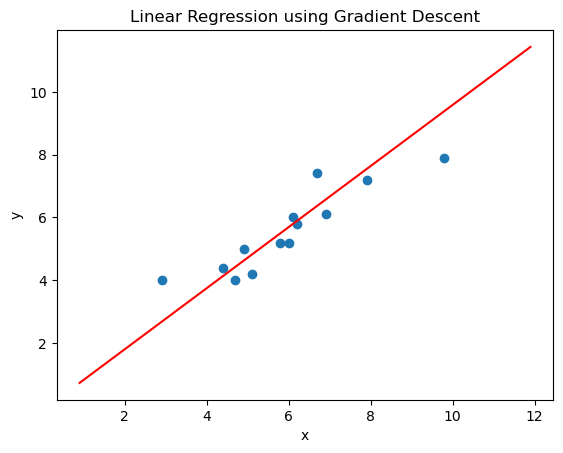

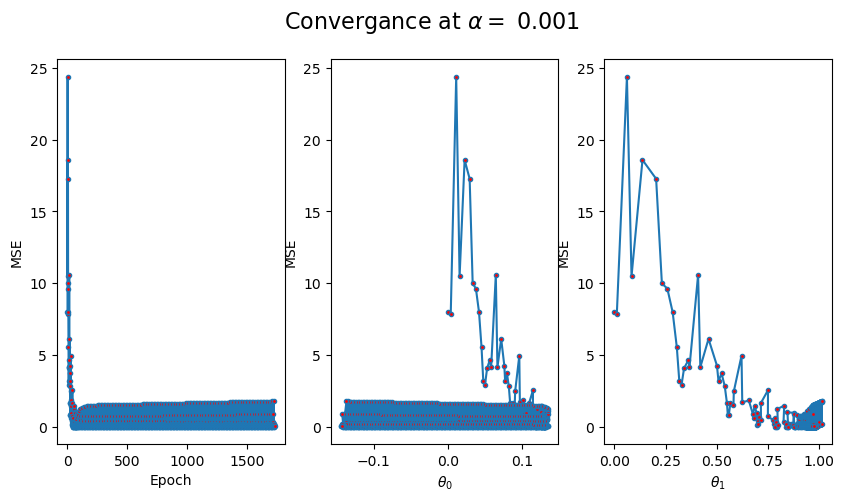

In [15]:
lr_compare_stoch = lr.Linear_Regression(X, y)
lr_compare_stoch.fit(solver="stochastic", alpha=1e-3, stop_criteria=1e-3, max_epochs=1e4)
lr_compare_stoch.show_summary()
lr_compare_stoch.plot_LR_2D()
lr_compare_stoch.plot_MSE()

## Second comparison
Quality is suffering in stochastic gradient descent as well as mini_batch. The following trials will use a gentler learning rate to see its effect.

Solver summary:
Number of iterations:  972
MSE:  0.2604141560242795
Stop criteria was reached first:  True
Model Training accuracy:  0.6963592684557094


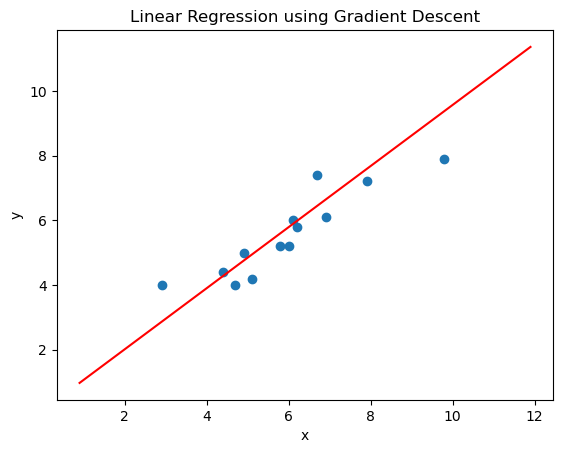

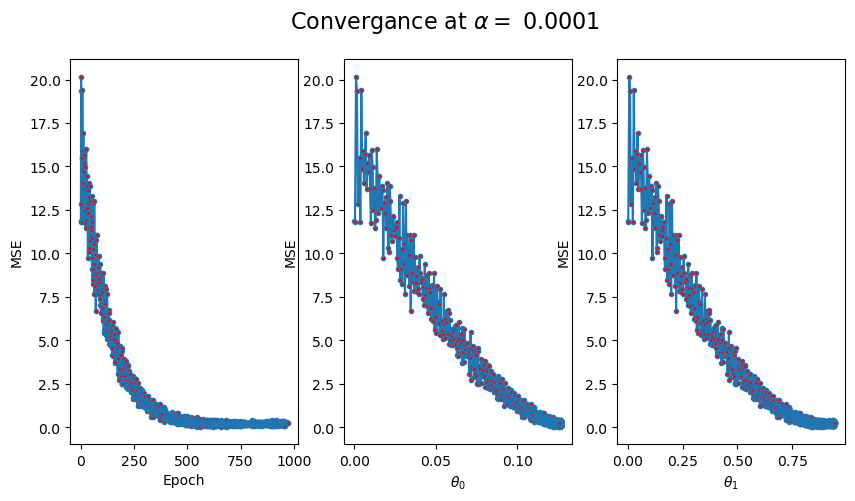

In [16]:
lr_compare_mini = lr.Linear_Regression(X, y)
lr_compare_mini.fit(solver="mini_batch", alpha=1e-4, n_batches=2, stop_criteria=1e-3, max_epochs=1e4, seed=42)
lr_compare_mini.show_summary()
lr_compare_mini.plot_LR_2D()
lr_compare_mini.plot_MSE()

Solver summary:
Number of iterations:  247
MSE:  1.670394923264088
Stop criteria was reached first:  True
Model Training accuracy:  -1.9987475648878141


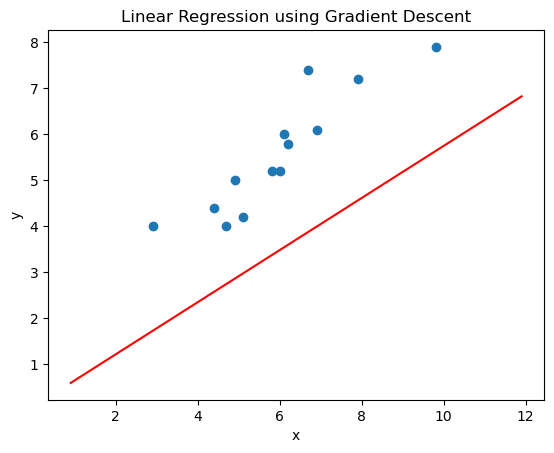

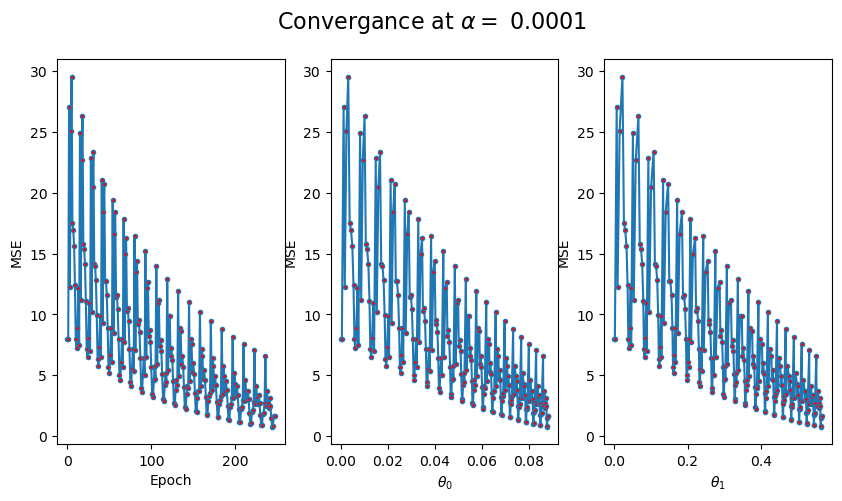

In [17]:
lr_compare_stoch = lr.Linear_Regression(X, y)
lr_compare_stoch.fit(solver="stochastic", alpha=1e-4, stop_criteria=1e-3, max_epochs=1e4)
lr_compare_stoch.show_summary()
lr_compare_stoch.plot_LR_2D()
lr_compare_stoch.plot_MSE()

Accuracy improved, in Mini batch but not stochastic, the stop criteria, however, was reached first everytime. In the following trial the stop criteria will be more restricted.
## Third comparison

Solver summary:
Number of iterations:  10000
MSE:  0.42063758482135866
Stop criteria was reached first:  False
Model Training accuracy:  0.5773013412559755


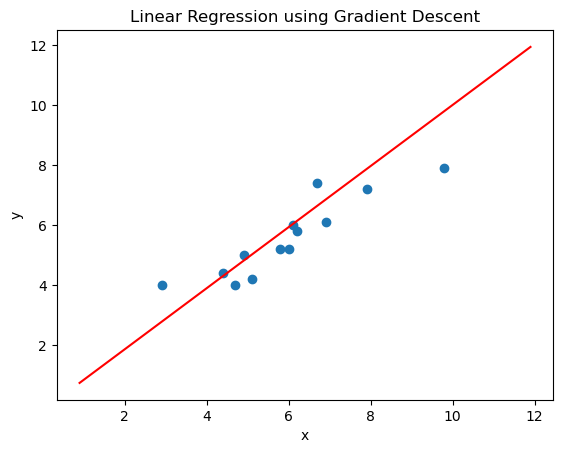

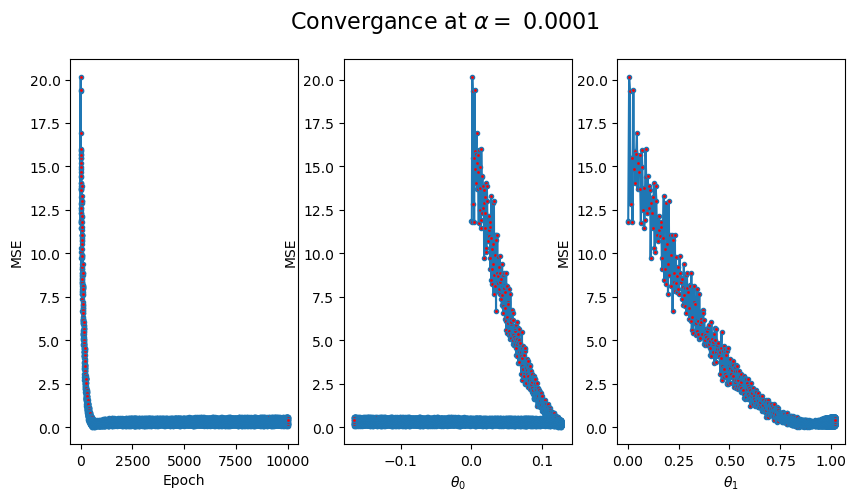

In [18]:
lr_compare_mini = lr.Linear_Regression(X, y)
lr_compare_mini.fit(solver="mini_batch", alpha=1e-4, n_batches=2, stop_criteria=1e-5, max_epochs=1e4, seed=42)
lr_compare_mini.show_summary()
lr_compare_mini.plot_LR_2D()
lr_compare_mini.plot_MSE()

Solver summary:
Number of iterations:  10010
MSE:  0.0783856497341719
Stop criteria was reached first:  False
Model Training accuracy:  0.6721641282461317


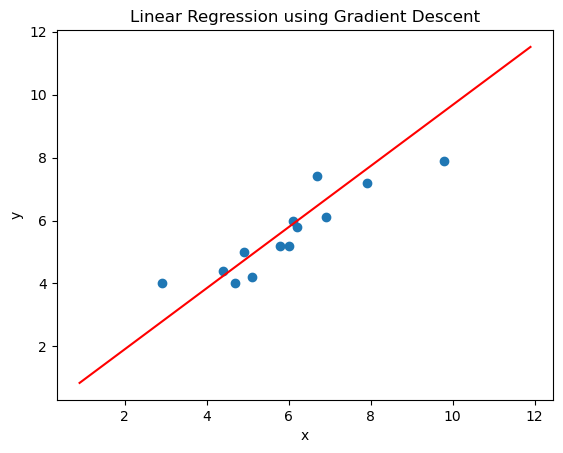

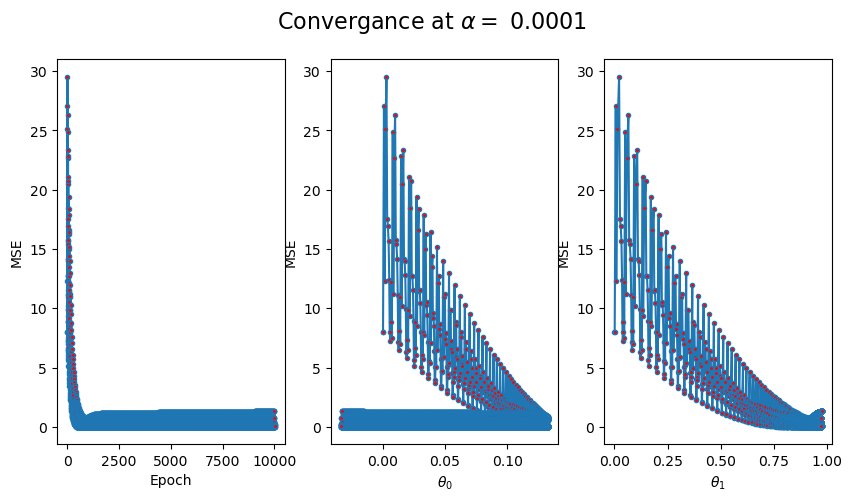

In [19]:
lr_compare_stoch = lr.Linear_Regression(X, y)
lr_compare_stoch.fit(solver="stochastic", alpha=1e-4, stop_criteria=1e-5, max_epochs=1e4)
lr_compare_stoch.show_summary()
lr_compare_stoch.plot_LR_2D()
lr_compare_stoch.plot_MSE()

Still no improvements compared to the first trial for stochastic and second trial in terms of mini batch